In [7]:
from metal.layers.dense import Dense
from metal.layers.softmax import Softmax

from metal.layers.conv2D import Conv2D
from metal.layers.flatten import Flatten
from metal.losses.loss import CrossEntropy
from metal.losses.loss_functions import CrossEntropy as cp
from metal.nn.neuralnetwork import NeuralNetwork
from metal.initializers.optimizer_init import OptimizerInitializer, Adam
from metal.initializers.scheduler_init import SchedulerInitializer
from metal.layers.pooling import Pool2D
import numpy as np
from metal.utils.functions import to_categorical
from sklearn import datasets
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
import scipy.ndimage as ndi


In [8]:
def imgs_trans(imgs_in,size):
    factor = size/imgs_in.shape[1]
    imgs_out = ndi.zoom(imgs_in, (1, factor, factor, 1), order=2)
    print(imgs_out.shape)
    return imgs_out


In [9]:
imgs = np.load('../../../downloads/catdog.npy',allow_pickle=True)
labels = np.load('../../../downloads/catdoglabels.npy',allow_pickle=True)

In [10]:
#fashion_mnist = keras.datasets.fashion_mnist
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [11]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (_, _) = fashion_mnist.load_data()

X_train = X_train[:10000].reshape(10000, 28, 28, 1)/255.0
y_train = y_train[:10000]/255.0
X_train = imgs_trans(X_train,12)
y_train = to_categorical(y_train.astype("int"))


(10000, 12, 12, 1)


In [12]:
#X = imgs
#y = labels

In [13]:
#optimizer = Adam()
data = datasets.load_digits()
X = data.data
y = data.target
#loss = CrossEntropy
# Covnet to  one-hot encoding 
y = to_categorical(y.astype("int"))

In [14]:
layer = [Conv2D(16,(3,3),'same',stride=1,optimizer=Adam(),act_fn='relu'),
Pool2D((2,2),pad='same',optimizer=Adam()),
Conv2D(16,(3,3),'same',stride=1,optimizer=Adam(),act_fn='relu'),
Flatten(optimizer=Adam()),
Dense(256,optimizer=Adam(),act_fn='relu'),
Dense(10,optimizer=Adam()),
Softmax(optimizer=Adam())         
]



In [15]:
train_labels

NameError: name 'train_labels' is not defined

In [16]:
def train_test_split(X, y, test_size=0.5, shuffle=True, seed=None):
    """ Split the data into train and test sets """
    if shuffle:
        X, y = shuffle_data(X, y, seed)
    # Split the training data from test data in the ratio specified in
    # test_size
    split_i = len(y) - int(len(y) // (1 / test_size))
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]

    return X_train, X_test, y_train, y_test

def shuffle_data(X, y, seed=None):
    """ Random shuffle of the samples in X and y """
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    return X[idx], y[idx]


In [17]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, seed = 1)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.4, seed = 9)


In [18]:
X_train.shape,X_test.shape


((6000, 12, 12, 1), (4000, 12, 12, 1))

In [19]:
X_train = train_images.reshape((-1,28,28,1)).astype('float32')/255.0
X_test = test_images.reshape((-1,28,28,1)).astype('float32')/255.0
y_train = to_categorical(train_labels.astype("int"))
y_test = to_categorical(test_labels.astype("int"))


NameError: name 'train_images' is not defined

In [20]:
nn = NeuralNetwork(Adam(),cp(),layers=layer,validation_data=(X_test,y_test))

In [9]:
train_err, val_err = nn.fit(X_train, y_train, n_epochs=10, batch_size=64)


test$$$   2.339130216109036 0.0
test$$$   2.479902963115869 0.0
test$$$   2.3743231701313534 0.125
test$$$   2.350306034593043 0.0
test$$$   2.3329988043330427 0.0
test$$$   2.3188490114291462 0.0
test$$$   2.318778704468327 0.0
test$$$   2.320530700639915 0.0
test$$$   2.3188684672019217 0.0
test$$$   2.3147929051687255 0.0
test$$$   2.310169044508998 0.015625
test$$$   2.308520169915815 0.015625
test$$$   2.3064876849047655 0.015625
test$$$   2.3063890524965247 0.015625
test$$$   2.3055365203628617 0.03125
test$$$   2.305164242218467 0.0
test$$$   2.304590437060543 0.015625
test$$$   2.304544418050499 0.015625
test$$$   2.30457904725242 0.015625
test$$$   2.304304036377478 0.03125
test$$$   2.304157394124046 0.03125
test$$$   2.3040756998912633 0.03125
test$$$   2.3040139061797498 0.0625
test$$$   2.3039411418435223 0.015625
test$$$   2.303620407978322 0.046875
test$$$   2.3035289497514184 0.046875
test$$$   2.3034739366716175 0.015625
test$$$   2.303453707254491 0.09375
test$$$   2.

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (1,) and (0,)

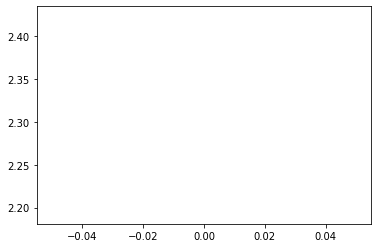

In [10]:
nn.eval(X_test, y_test)


In [1]:
from deprecated.metal.nn import NeuralNetwork
from deprecated.metal.utils import train_test_split, to_categorical, normalize,standardize
from deprecated.metal.utils import get_random_subsets, shuffle_data, Plot
from deprecated.metal.utils.data_operation import accuracy_score
from deprecated.metal.optimizers import StochasticGradientDescent,Adam
from deprecated.metal.loss_functions import CrossEntropy
from deprecated.metal.utils.misc import bar_widgets
from deprecated.metal.layers.dropout import Dropout

from deprecated.metal.layers.batchnormalization_ import BatchNormalization
from deprecated.metal.layers.dense import Dense
from deprecated.metal.layers.conv2D import Conv2D
from deprecated.metal.layers.flatten import Flatten
from deprecated.metal.layers.layer import Activation
from autograd.tensor import Tensor
from autograd.parameter import Parameter
from deprecated.metal.models.convnet import ConvNet
import h5py

In [2]:
from __future__ import print_function
from sklearn import datasets
import matplotlib.pyplot as plt
import math 
import numpy as np
import PIL
from PIL import Image
import urllib
from skimage.transform import resize

In [3]:

import numpy as np
import scipy.ndimage as ndi

def img_tran(imgs_in,size):
    factor = size/imgs_in.shape[1]
    imgs_out = ndi.zoom(imgs_in, (1, factor, factor, 1), order=2)
    print(imgs_out.shape)
    return imgs_out

In [4]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (_, _) = fashion_mnist.load_data()

X_train = X_train[:10000].reshape(10000, 28, 28, 1)
y_train = y_train[:10000]
X_train = img_tran(X_train,12)

(10000, 12, 12, 1)


In [6]:
y_train = to_categorical(y_train.astype("int"))


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.4, seed = 9)


In [8]:
X_train.shape,X_test.shape


((6000, 12, 12, 1), (4000, 12, 12, 1))

In [9]:

optimizer = Adam()
loss = CrossEntropy

In [10]:
X_train = X_train.reshape((-1,1,12,12))/255.0
X_test = X_test.reshape((-1,1,12,12))/255.0


In [11]:
X_train = Parameter(X_train, requires_grad=True)
X_test = Parameter(X_test, requires_grad=True)
y_train = Parameter(y_train, requires_grad=True)
y_test = Parameter(y_test, requires_grad=True)

In [12]:
covnet = ConvNet(optimizer=optimizer, loss=loss,  validation_data=(X_test,y_test))


In [13]:
covnet.add(Conv2D(n_filters=16, filter_shape=(3,3), stride=1, input_shape=(1,12,12), padding='same', seed=1))
covnet.add(Activation('relu'))
#covnet.add(Dropout(.25))
#covnet.add(BatchNormalization())

covnet.add(Conv2D(n_filters=16, filter_shape=(3,3), stride=1, padding='same', seed=2))
covnet.add(Flatten(input_shape=(1,12,12)))
#covnet.add(BatchNormalization())
covnet.add(Dense(256, seed=4))
covnet.add(Activation('relu'))
#covnet.add(Dropout(.25))
covnet.add(Dense(10,seed=3))
covnet.add(Activation('softmax'))

In [14]:
#train_err, val_err = covnet.fit(X_train, y_train, n_epochs=10, batch_size=82)


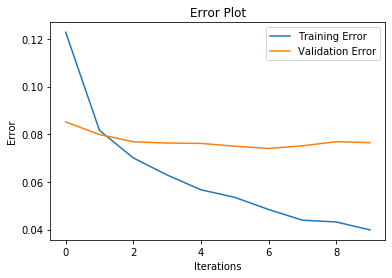

Accuracy: 0.84975


In [15]:
covnet.eval(X_test, y_test)


In [15]:
imgs = np.load('../../../downloads/catdog.npy',allow_pickle=True)
labels = np.load('../../../downloads/catdoglabels.npy',allow_pickle=True)

In [16]:
X = imgs
y = labels

In [17]:
X[:1].shape

(1, 224, 224, 3)

In [18]:
X_train = Parameter(X[1:2][0].reshape(1,3, 224, 224), requires_grad=True)


In [19]:
c1 = Conv2D(n_filters=1, filter_shape=(3,3), stride=1, input_shape=(3,224,224), padding='same')
c1.initialize()
c1.w.shape

(1, 3, 3, 3)

In [20]:
import time

In [21]:
s = time.time()
vc=c1.forward_pass(X_train,True)
e = time.time()

e-s

0.03226780891418457

In [31]:
from metal.layers.conv2D import Conv2D as c2d
from metal.initializers.optimizer_init import Adam as ad


In [32]:
c2 = c2d(1,(3,3),'same',stride=1,optimizer=ad())

In [33]:
s = time.time()
oc=c2.forward(X_train.data.reshape(-1,224,224,3))
e = time.time()

e-s

TypeError: cannot unpack non-iterable int object

In [25]:
oc[0].shape,c2.parameters["W"].shape

((224, 224, 1), (3, 3, 3, 1))

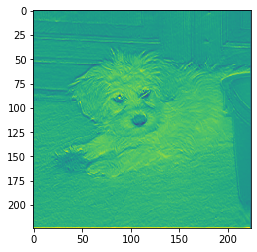

In [26]:
plt.imshow(oc[0].reshape(224,224))


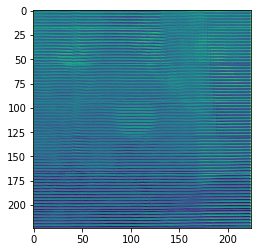

In [27]:
plt.imshow(vc.data[0].reshape(224,224))


In [28]:
vc.data[0].shape

(1, 224, 224)

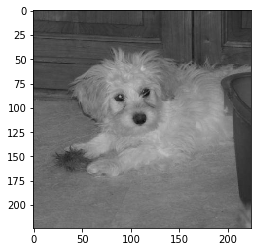

In [29]:
plt.imshow(X[1:2][0])


In [56]:
X[1].shape

(224, 224, 3)

In [30]:
[1,2,3][:2]

[1, 2]